In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with size {size} bytes'.format(
        name=fn, size=len(uploaded[fn])
    ))

df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset loaded successfully!")
df.head()

Saving synthetic_stroke_data.csv to synthetic_stroke_data.csv
User uploaded file "synthetic_stroke_data.csv" with size 3251777 bytes
Dataset loaded successfully!


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0
1,2,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0
2,3,Male,87.5,0,0,Yes,Children,Urban,118.42,34.7,never smoked,0
3,4,Male,19.7,0,0,Yes,Private,Urban,226.01,27.1,smokes,0
4,5,Male,85.2,0,0,Yes,Children,Rural,229.64,27.6,Unknown,0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv("/content/synthetic_stroke_data.csv")

In [4]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0
1,2,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0
2,3,Male,87.5,0,0,Yes,Children,Urban,118.42,34.7,never smoked,0
3,4,Male,19.7,0,0,Yes,Private,Urban,226.01,27.1,smokes,0
4,5,Male,85.2,0,0,Yes,Children,Rural,229.64,27.6,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,Female,64.3,0,0,No,Govt_job,Rural,118.92,19.4,never smoked,0
49996,49997,Female,72.1,0,0,Yes,Children,Urban,120.36,21.6,Unknown,0
49997,49998,Female,80.5,0,0,Yes,Children,Rural,82.62,35.1,Unknown,0
49998,49999,Female,29.2,0,0,Yes,Children,Urban,86.16,32.1,formerly smoked,0


In [5]:
data = dataset.copy()

In [6]:
data.shape

(50000, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  object 
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  object 
 6   work_type          50000 non-null  object 
 7   Residence_type     50000 non-null  object 
 8   avg_glucose_level  50000 non-null  float64
 9   bmi                47500 non-null  float64
 10  smoking_status     50000 non-null  object 
 11  stroke             50000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ MB


In [8]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,2500


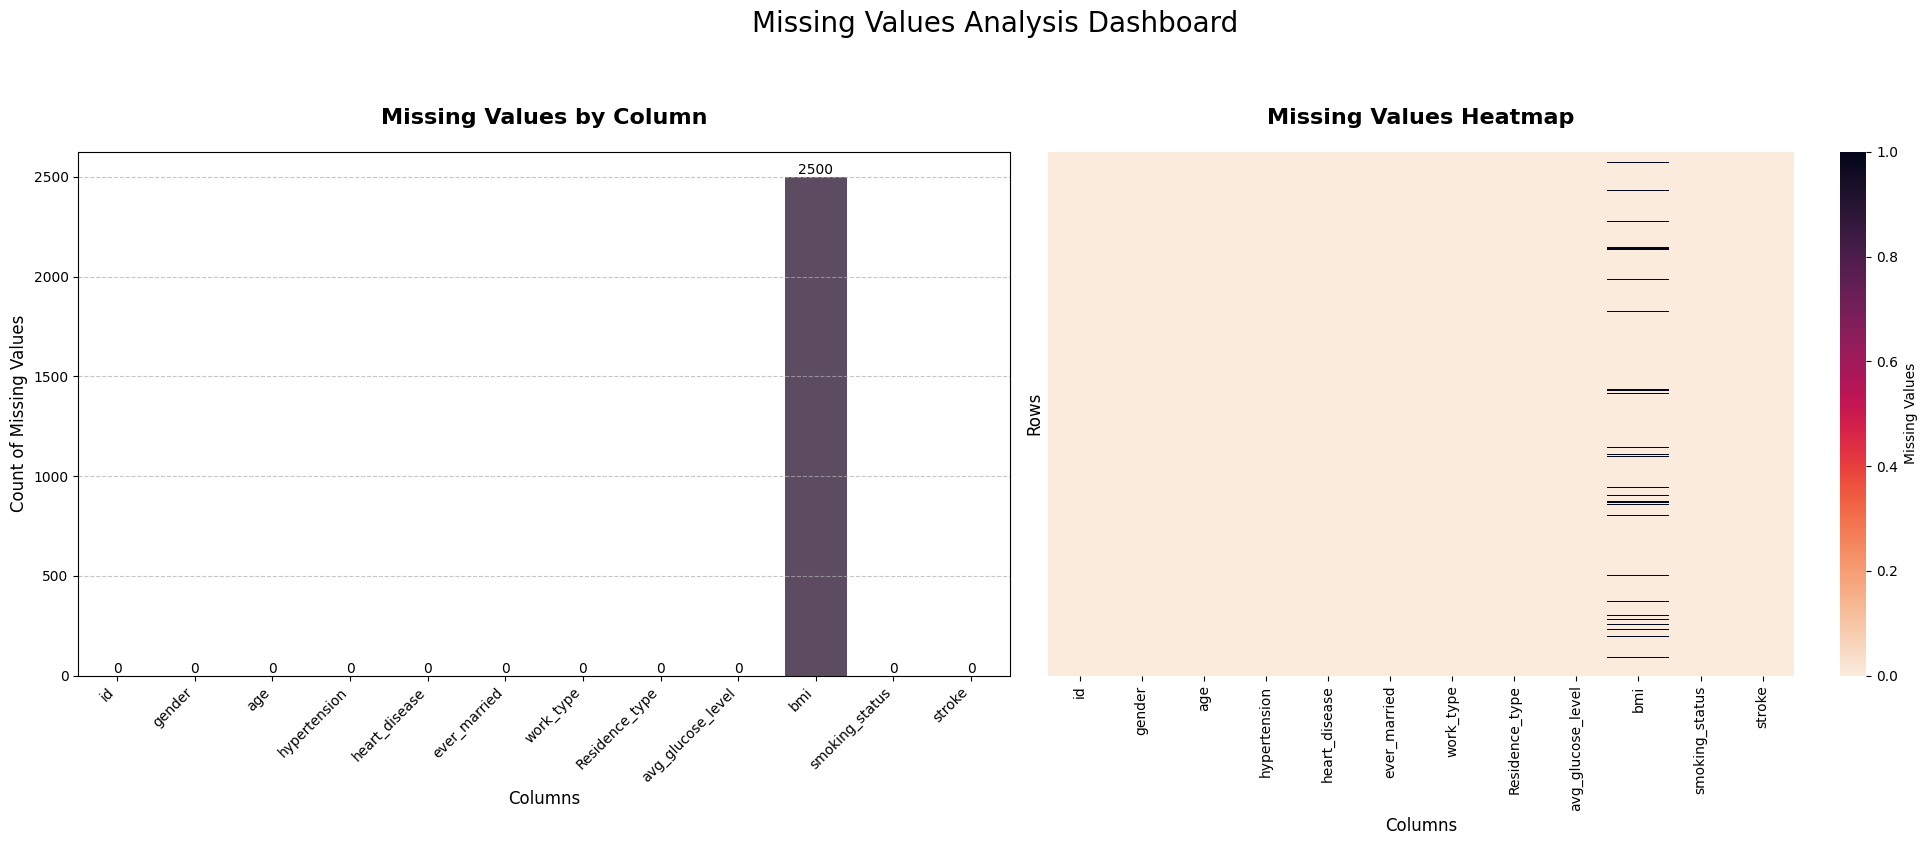

In [9]:
fig = plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
missing_values = df.isnull().sum()
ax = sns.barplot(x=missing_values.index, y=missing_values.values, alpha=0.8, color='#35193e')
plt.title('Missing Values by Column', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(missing_values.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.heatmap(df.isnull(),
            cmap='rocket_r',
            yticklabels=False,
            cbar_kws={'label': 'Missing Values'})
plt.title('Missing Values Heatmap', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

plt.suptitle('Missing Values Analysis Dashboard', fontsize=20, y=1.05)
plt.tight_layout()

plt.show()

In [10]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47500.000000,50000.000000
mean,25000.500000,54.021022,0.151220,0.102660,159.964413,27.540118,0.048540
std,14433.901067,20.809341,0.358267,0.303517,51.890421,7.216627,0.214906
min,1.000000,18.000000,0.000000,0.000000,70.010000,15.000000,0.000000
25%,12500.750000,36.100000,0.000000,0.000000,114.715000,21.300000,0.000000
50%,25000.500000,54.000000,0.000000,0.000000,160.100000,27.600000,0.000000
75%,37500.250000,72.100000,0.000000,0.000000,205.035000,33.800000,0.000000
max,50000.000000,90.000000,1.000000,1.000000,250.000000,40.000000,1.000000


In [11]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

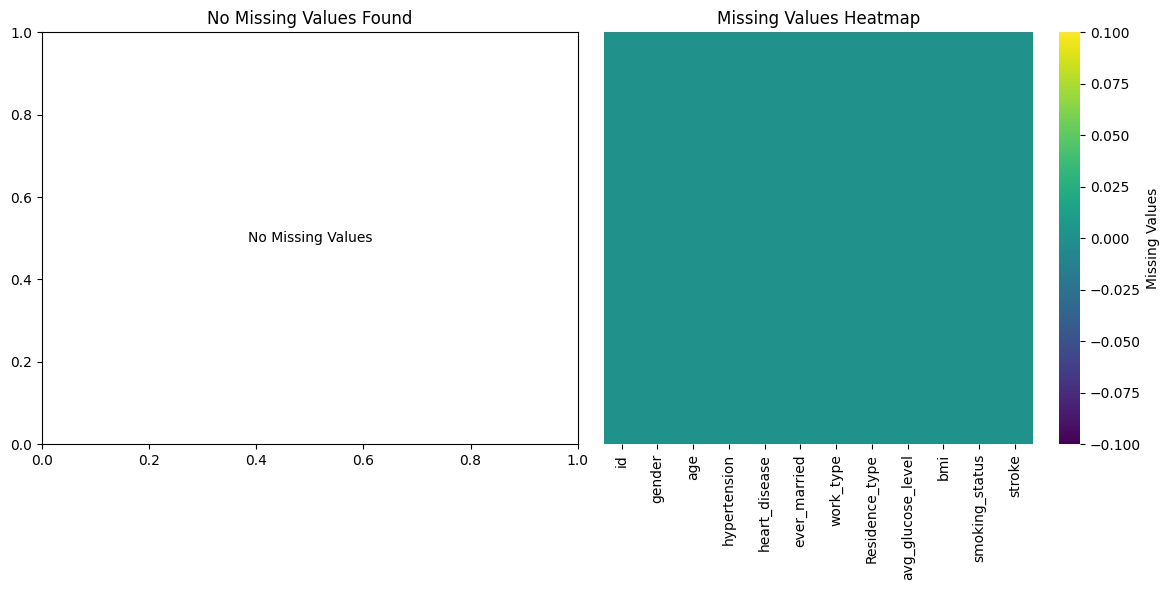

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

# Define missing_data correctly
missing_counts = data.isnull().sum()
missing_percentages = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percentages})

missing_plot_data = missing_data[missing_data['Missing Count'] > 0]
if not missing_plot_data.empty:
    plt.bar(missing_plot_data.index, missing_plot_data['Missing Percentage'], color='coral', alpha=0.7)
    plt.xticks(rotation=45)
    plt.ylabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')

    for i, v in enumerate(missing_plot_data['Missing Percentage']):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')
else:
    plt.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('No Missing Values Found')

plt.subplot(1, 2, 2)
sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap='viridis',
            cbar_kws={'label': 'Missing Values'})
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [14]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']


print("OUTLIER DETECTION - NUMERICAL FEATURES")
print("="*50)

outlier_summary = []

for col in numerical_columns:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(data)) * 100

        outlier_summary.append({
            'Feature': col,
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percent,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound
        })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.round(4))

OUTLIER DETECTION - NUMERICAL FEATURES
             Feature  Outlier Count  Outlier Percentage  Lower Bound  \
0                age              0               0.000      -17.900   
1  avg_glucose_level              0               0.000      -20.765   
2                bmi              0               0.000        3.750   
3       hypertension           7561              15.122        0.000   
4      heart_disease           5133              10.266        0.000   

   Upper Bound  
0      126.100  
1      340.515  
2       51.350  
3        0.000  
4        0.000  


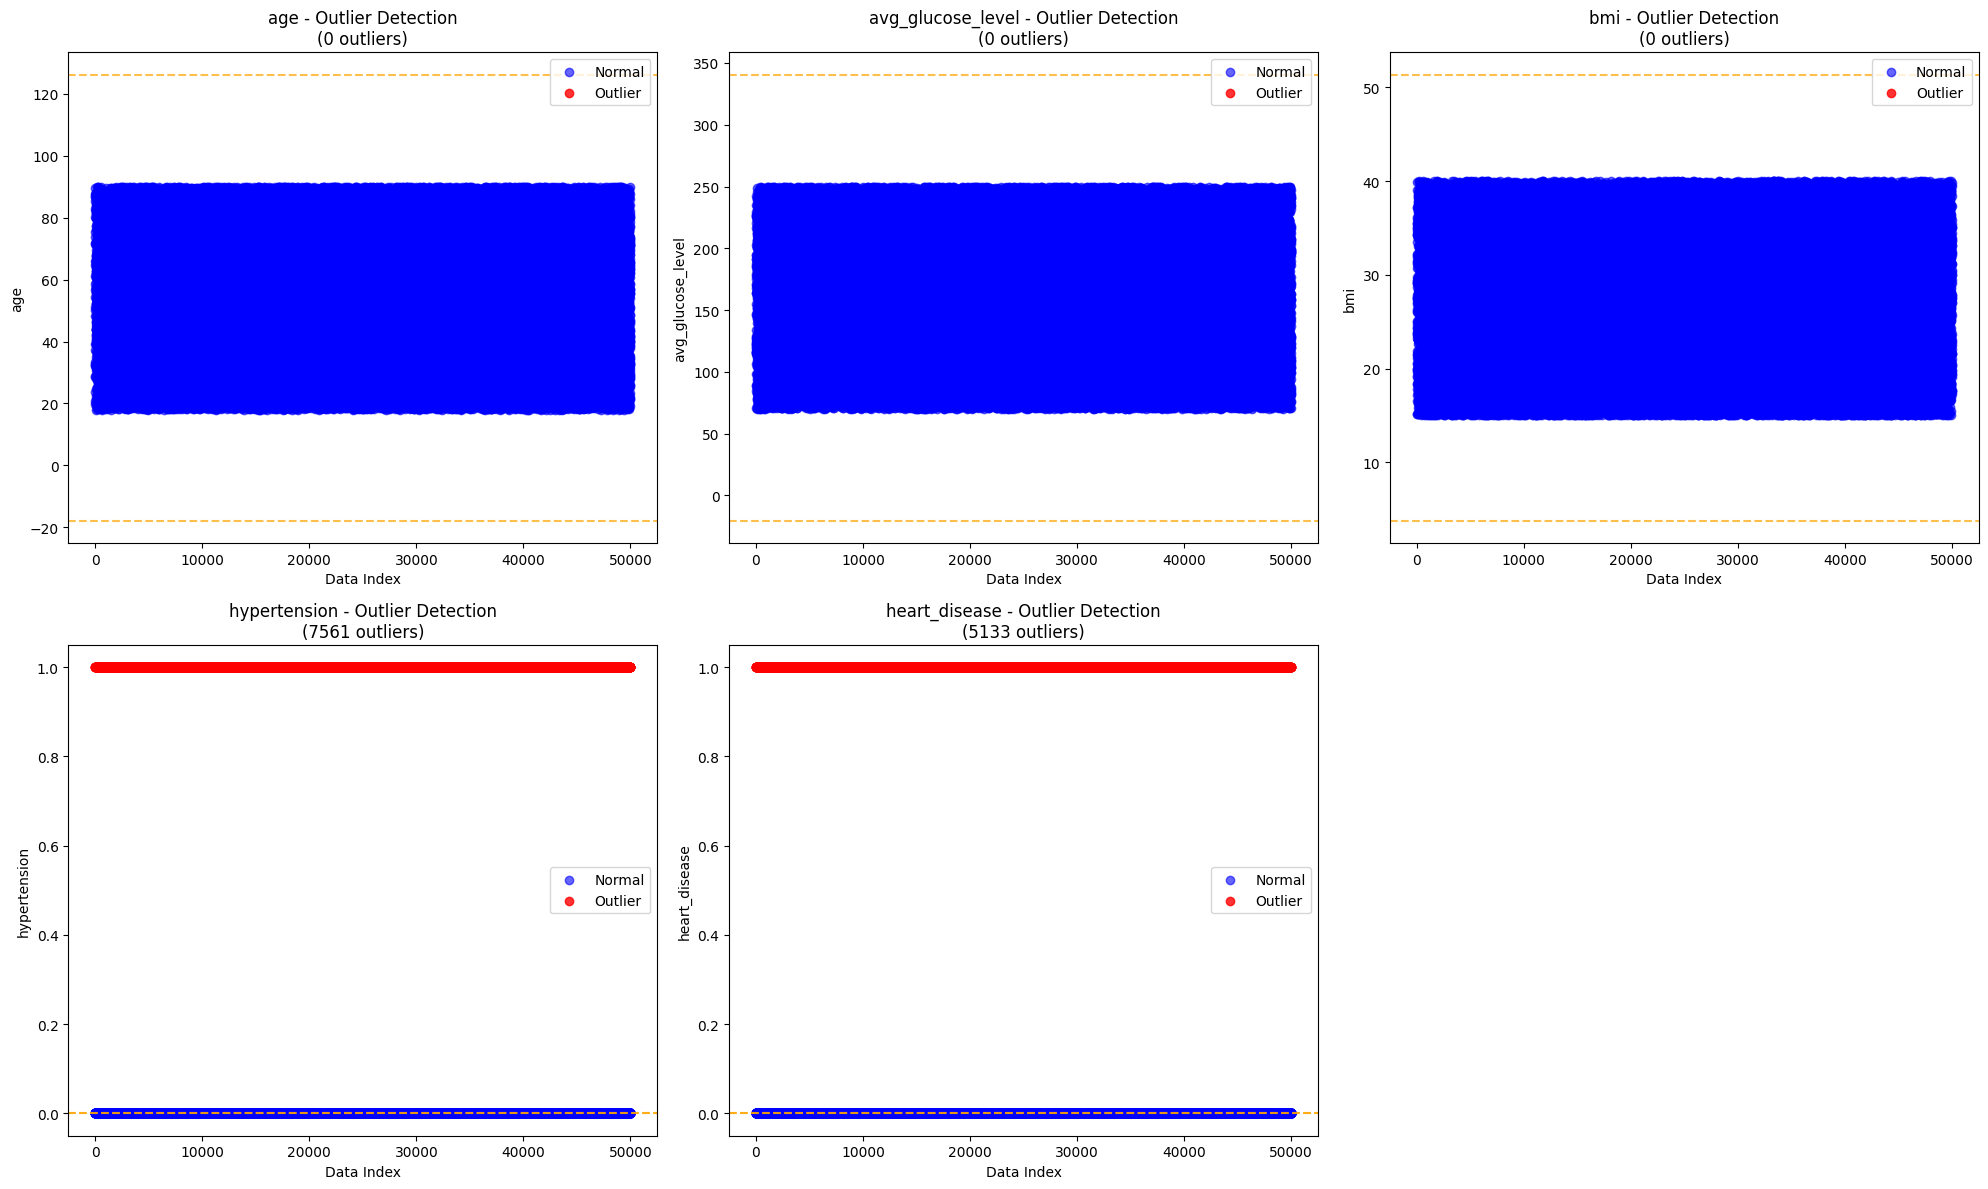

In [16]:
plt.figure(figsize=(20, 12))

# Use the 'numerical_columns' list which contains existing numerical columns
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    is_outlier = (data[col] < lower_bound) | (data[col] > upper_bound)

    plt.scatter(data[~is_outlier].index, data[~is_outlier][col],
                alpha=0.6, label='Normal', color='blue')
    plt.scatter(data[is_outlier].index, data[is_outlier][col],
                alpha=0.8, label='Outlier', color='red')

    plt.axhline(y=lower_bound, color='orange', linestyle='--', alpha=0.7)
    plt.axhline(y=upper_bound, color='orange', linestyle='--', alpha=0.7)

    plt.xlabel('Data Index')
    plt.ylabel(col)
    plt.title(f'{col} - Outlier Detection\n({is_outlier.sum()} outliers)')
    plt.legend()

plt.tight_layout()
plt.show()

In [17]:
data_original = data.copy()

for col in numerical_columns:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count_before = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

        if outlier_count_before > 0:
            # Strategy 1: Capping (Winsorization)
            data[f'{col}_capped'] = np.where(data[col] < lower_bound, lower_bound,
                                           np.where(data[col] > upper_bound, upper_bound, data[col]))

            outlier_count_after = ((data[f'{col}_capped'] < lower_bound) |
                                 (data[f'{col}_capped'] > upper_bound)).sum()

            print(f"{col}: Capped {outlier_count_before} outliers → {outlier_count_after} remaining")

print(f"\nOriginal data shape: {data_original.shape}")
print(f"Processed data shape: {data.shape}")

hypertension: Capped 7561 outliers → 0 remaining
heart_disease: Capped 5133 outliers → 0 remaining

Original data shape: (50000, 12)
Processed data shape: (50000, 14)


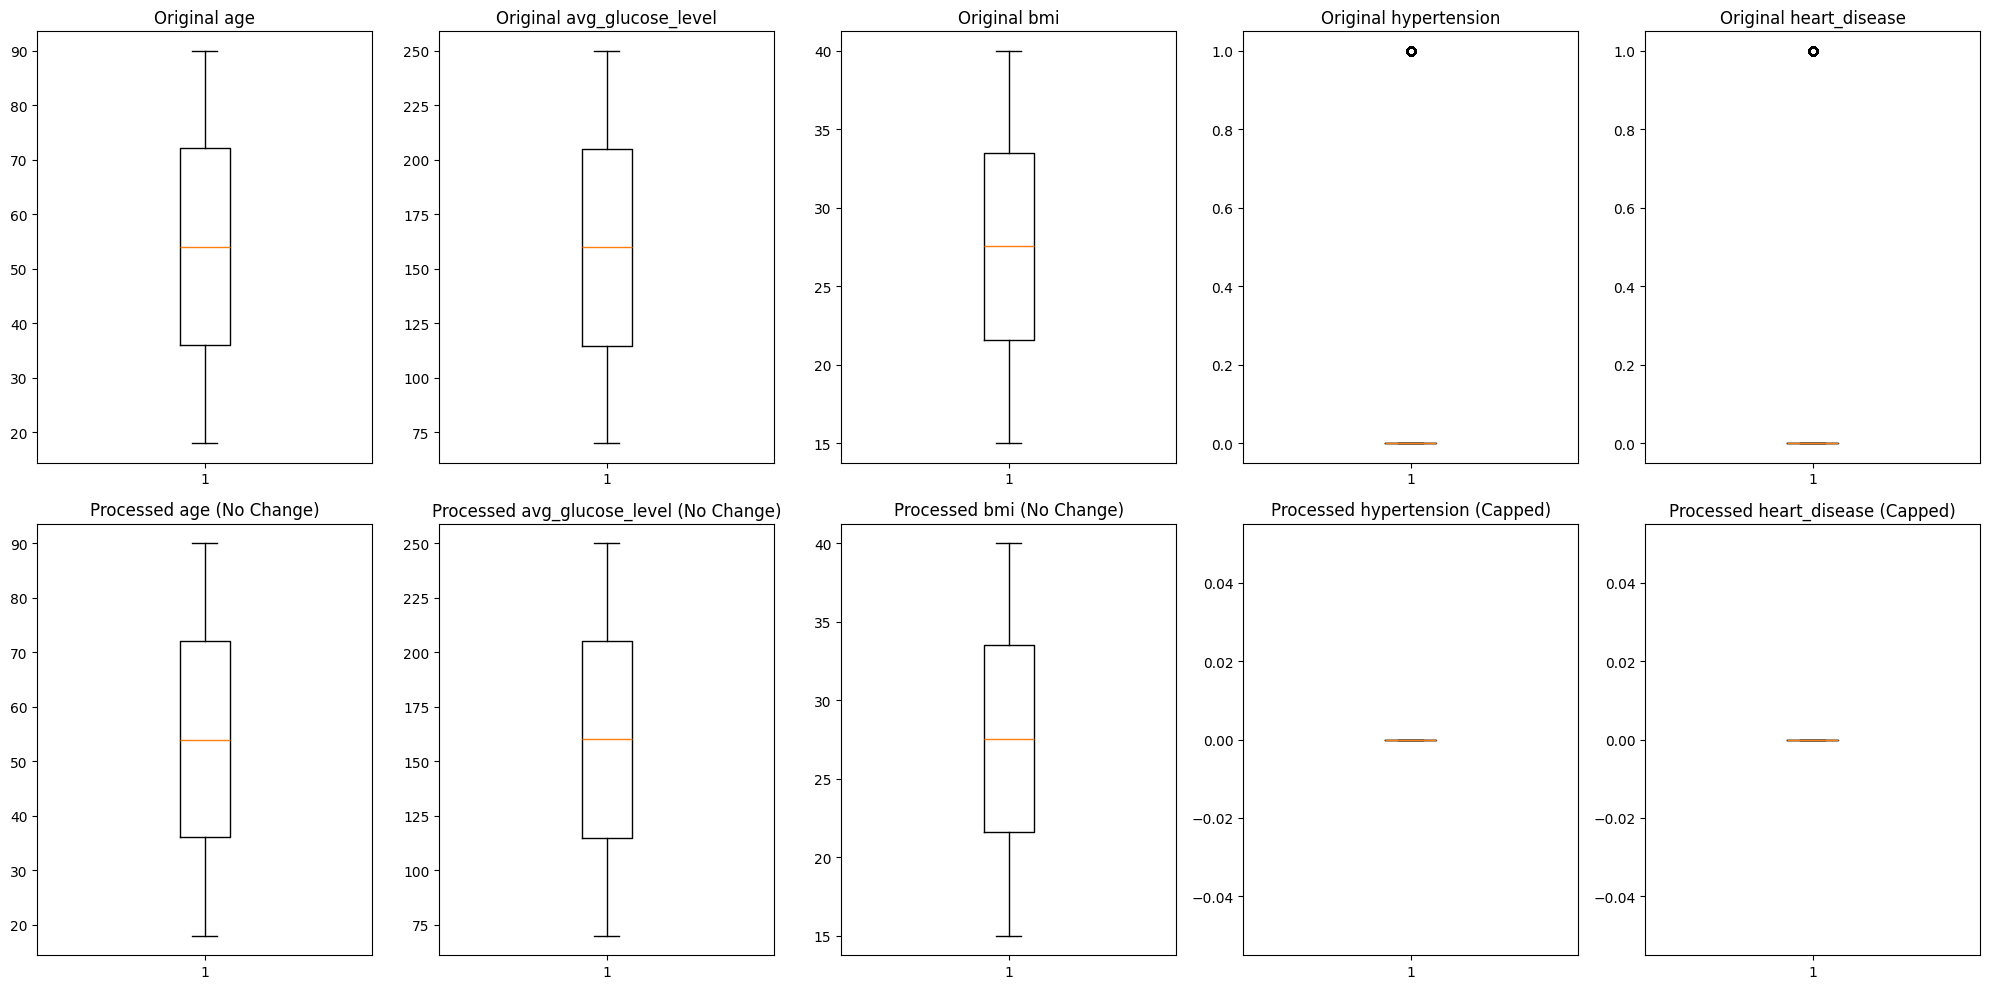

In [18]:
plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_columns[:5]):
    if col in data.columns:
        # Plot original in the first row
        plt.subplot(2, 5, i + 1)
        plt.boxplot(data_original[col].dropna())
        plt.title(f'Original {col}')

        # Plot processed in the second row
        # For a 2x5 grid, the second row starts at index 5+1 = 6
        plt.subplot(2, 5, i + 6)
        if f'{col}_capped' in data.columns:
            plt.boxplot(data[f'{col}_capped'].dropna())
            plt.title(f'Processed {col} (Capped)')
        else:
            plt.boxplot(data[col].dropna())
            plt.title(f'Processed {col} (No Change)')

plt.tight_layout()
plt.show()

In [19]:
data.drop(columns=['id'],axis=1,inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hypertension_capped,heart_disease_capped
0,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0,0.0,0.0
1,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0,0.0,0.0
2,Male,87.5,0,0,Yes,Children,Urban,118.42,34.7,never smoked,0,0.0,0.0
3,Male,19.7,0,0,Yes,Private,Urban,226.01,27.1,smokes,0,0.0,0.0
4,Male,85.2,0,0,Yes,Children,Rural,229.64,27.6,Unknown,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Female,64.3,0,0,No,Govt_job,Rural,118.92,19.4,never smoked,0,0.0,0.0
49996,Female,72.1,0,0,Yes,Children,Urban,120.36,21.6,Unknown,0,0.0,0.0
49997,Female,80.5,0,0,Yes,Children,Rural,82.62,35.1,Unknown,0,0.0,0.0
49998,Female,29.2,0,0,Yes,Children,Urban,86.16,32.1,formerly smoked,0,0.0,0.0


In [20]:
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

In [21]:
print('work_type : ', data['work_type'].unique())
print('gender : ', data['gender'].unique())
print('Residence_type : ', data['Residence_type'].unique())
print('ever_married : ', data['ever_married'].unique())
print('smoking_status : ', data['smoking_status'].unique())

work_type :  ['Govt_job' 'Self-employed' 'Children' 'Private']
gender :  ['Female' 'Male']
Residence_type :  ['Urban' 'Rural']
ever_married :  ['Yes' 'No']
smoking_status :  ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


In [22]:
le=LabelEncoder()
smoking_status = le.fit_transform(data['smoking_status'])
gender = le.fit_transform(data['gender'])
ever_married = le.fit_transform(data['ever_married'])
Residence_type = le.fit_transform(data['Residence_type'])
work_type = le.fit_transform(data['work_type'])

In [23]:
data['work_type'] = work_type
data['gender'] = gender
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married
data['smoking_status'] = smoking_status

In [24]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hypertension_capped,heart_disease_capped
0,0,80.3,0,0,1,1,1,170.38,18.4,0,0,0.0,0.0
1,0,89.4,0,0,1,3,1,186.89,19.6,1,0,0.0,0.0
2,1,87.5,0,0,1,0,1,118.42,34.7,2,0,0.0,0.0
3,1,19.7,0,0,1,2,1,226.01,27.1,3,0,0.0,0.0
4,1,85.2,0,0,1,0,0,229.64,27.6,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,64.3,0,0,0,1,0,118.92,19.4,2,0,0.0,0.0
49996,0,72.1,0,0,1,0,1,120.36,21.6,0,0,0.0,0.0
49997,0,80.5,0,0,1,0,0,82.62,35.1,0,0,0.0,0.0
49998,0,29.2,0,0,1,0,1,86.16,32.1,1,0,0.0,0.0


In [25]:
data.nunique()

,0
gender,2
age,721
hypertension,2
heart_disease,2
ever_married,2
work_type,4
Residence_type,2
avg_glucose_level,16914
bmi,252
smoking_status,4


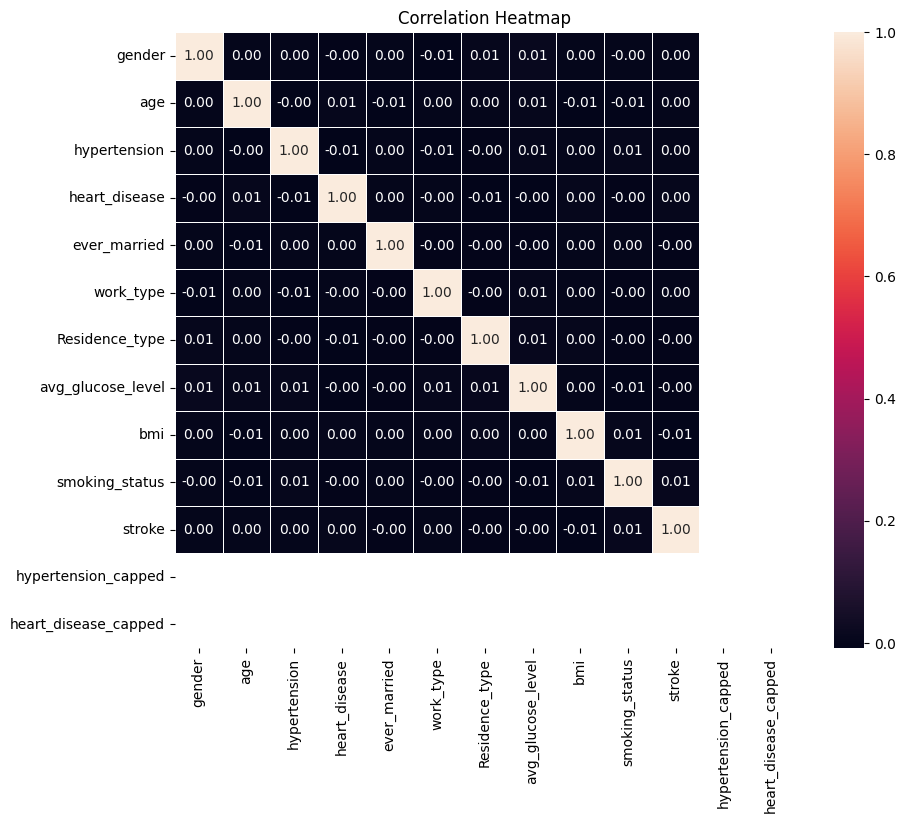

In [26]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
print(data['gender'].value_counts())
print(data['work_type'].value_counts())
print(data['Residence_type'].value_counts())
print(data['ever_married'].value_counts())
print(data['smoking_status'].value_counts())
print(data['hypertension'].value_counts())
print(data['heart_disease'].value_counts())

gender
0    25040
1    24960
Name: count, dtype: int64
work_type
3    12545
1    12524
2    12480
0    12451
Name: count, dtype: int64
Residence_type
1    25032
0    24968
Name: count, dtype: int64
ever_married
1    35098
0    14902
Name: count, dtype: int64
smoking_status
1    12549
2    12543
0    12524
3    12384
Name: count, dtype: int64
hypertension
0    42439
1     7561
Name: count, dtype: int64
heart_disease
0    44867
1     5133
Name: count, dtype: int64


In [28]:
print(dataset['gender'].value_counts())
print(dataset['work_type'].value_counts())
print(dataset['Residence_type'].value_counts())
print(dataset['ever_married'].value_counts())
print(dataset['smoking_status'].value_counts())

gender
Female    25040
Male      24960
Name: count, dtype: int64
work_type
Self-employed    12545
Govt_job         12524
Private          12480
Children         12451
Name: count, dtype: int64
Residence_type
Urban    25032
Rural    24968
Name: count, dtype: int64
ever_married
Yes    35098
No     14902
Name: count, dtype: int64
smoking_status
formerly smoked    12549
never smoked       12543
Unknown            12524
smokes             12384
Name: count, dtype: int64


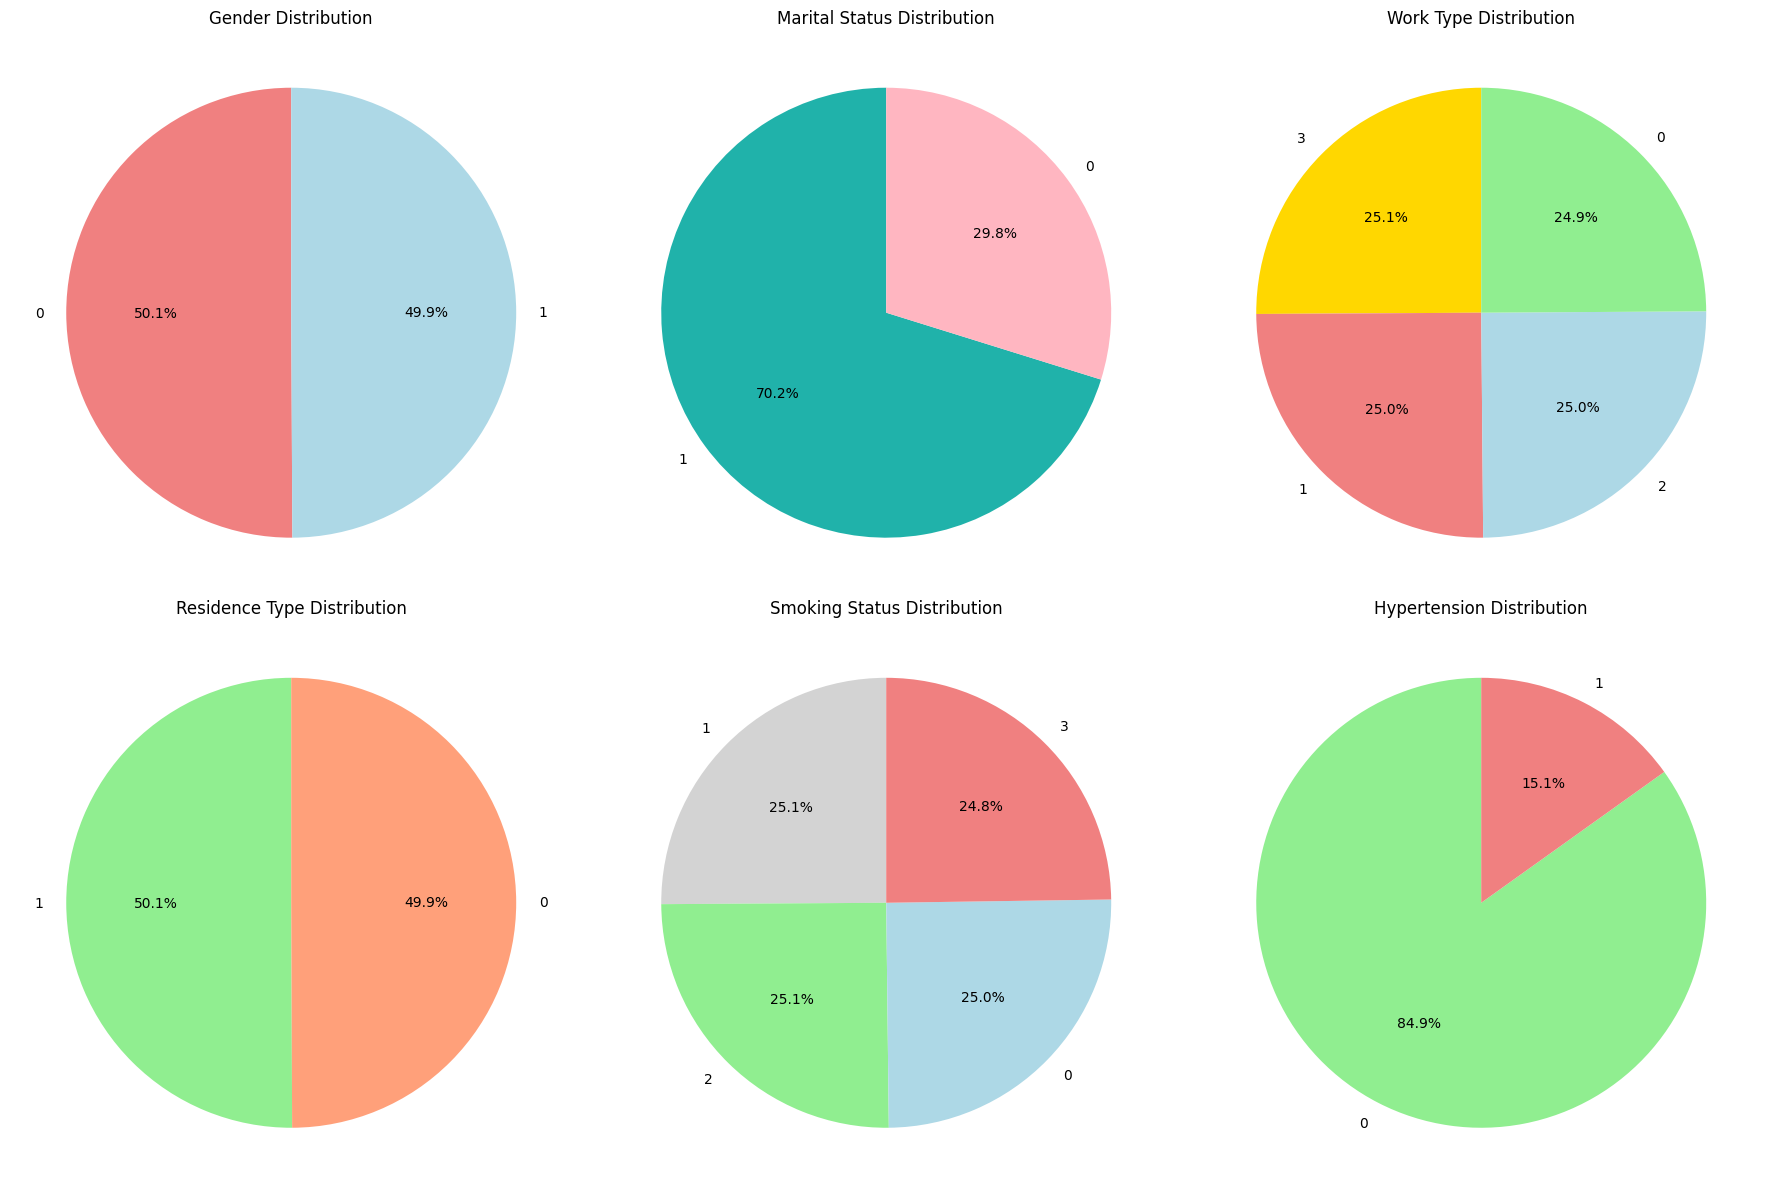

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension']
titles = ['Gender', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Hypertension']
colors_list = [['lightcoral', 'lightblue'], ['lightseagreen', 'lightpink'],
               ['gold', 'lightcoral', 'lightblue', 'lightgreen'], ['lightgreen', 'lightsalmon'],
               ['lightgray', 'lightgreen', 'lightblue', 'lightcoral'], ['lightgreen', 'lightcoral']]

for i, (var, title, colors) in enumerate(zip(categorical_vars, titles, colors_list)):
    row = i // 3
    col = i % 3
    counts = data[var].value_counts()
    axes[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[row, col].set_title(f'{title} Distribution')

plt.tight_layout()
plt.show()

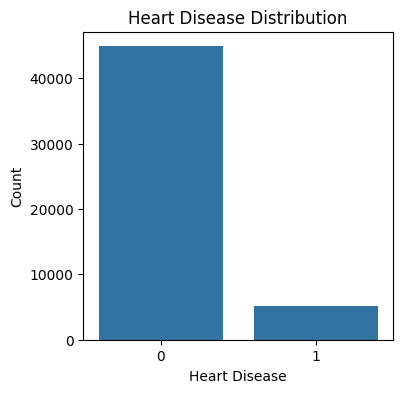

In [30]:
heart_disease_counts = data['heart_disease'].value_counts().reset_index()
heart_disease_counts.columns = ['Heart Disease', 'Count']

plt.figure(figsize = (4, 4))
bargraph = sns.barplot(x='Heart Disease', y='Count', data=heart_disease_counts)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title("Heart Disease Distribution")
plt.show()

Text(0.5, 1.0, 'Age vs Stroke')

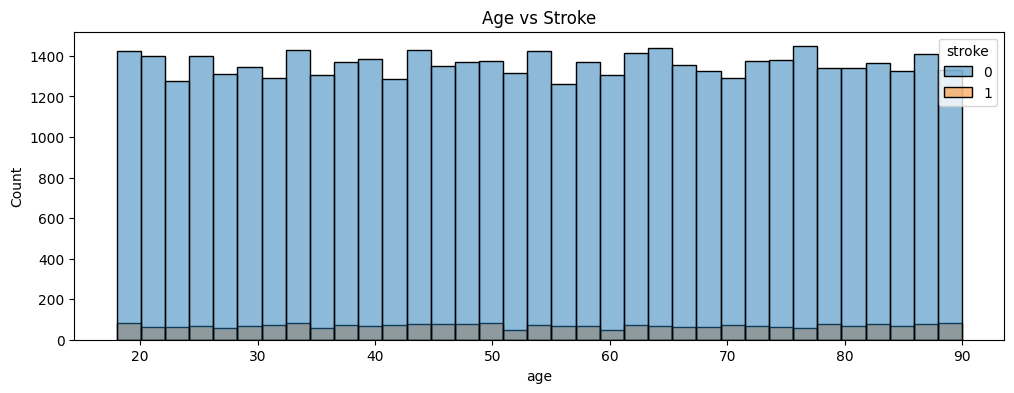

In [31]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=data, hue='stroke', bins=35)
pl.set_title('Age vs Stroke')

Text(0.5, 1.0, 'Average Glucose Level vs Stroke')

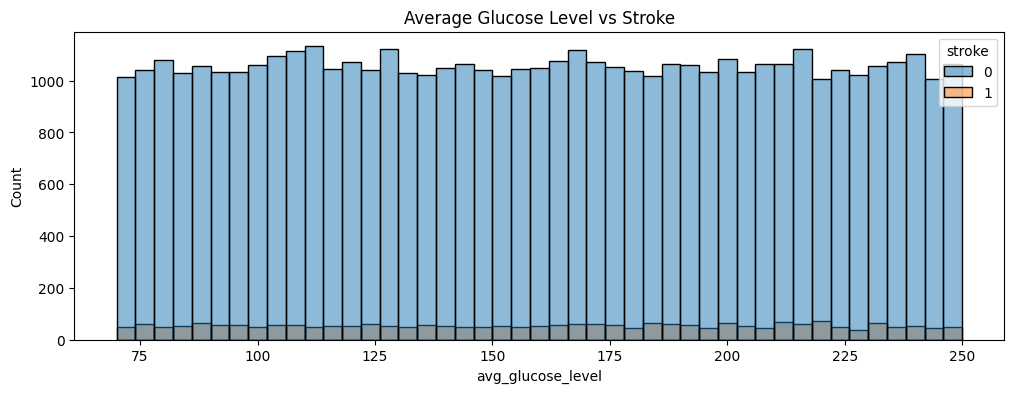

In [32]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='avg_glucose_level', data=data, hue='stroke', bins=45)
pl.set_title('Average Glucose Level vs Stroke')

Text(0.5, 1.0, 'Stroke vs BMI')

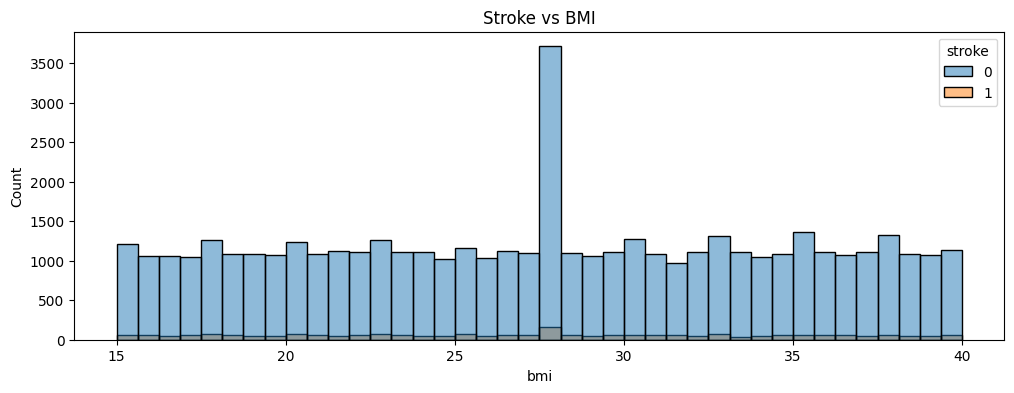

In [33]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='bmi', data=data, hue='stroke', bins=40)
pl.set_title('Stroke vs BMI')

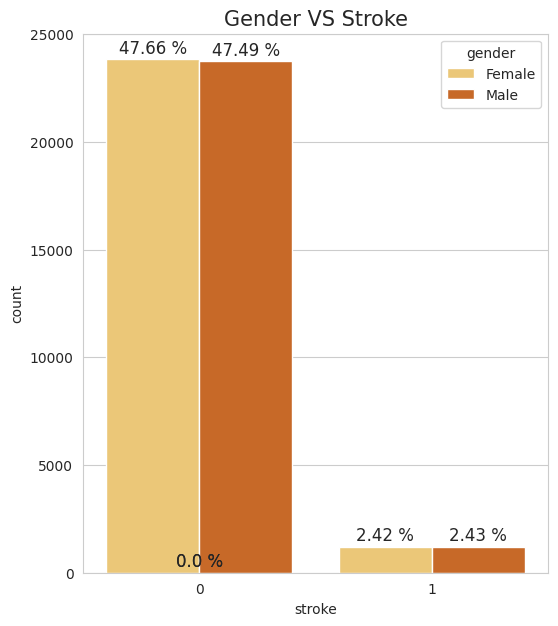

In [34]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (6,7))
ax=sns.countplot(x=data['stroke'],hue=dataset['gender'],palette = 'YlOrBr')
ax.set_title("Gender VS Stroke",fontsize = 15)

for j in ax.patches:
        ax.annotate(f'{round(j.get_height()/len(dataset)*100,2)} %', xy=(j.get_x() + j.get_width() / 2,
            j.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

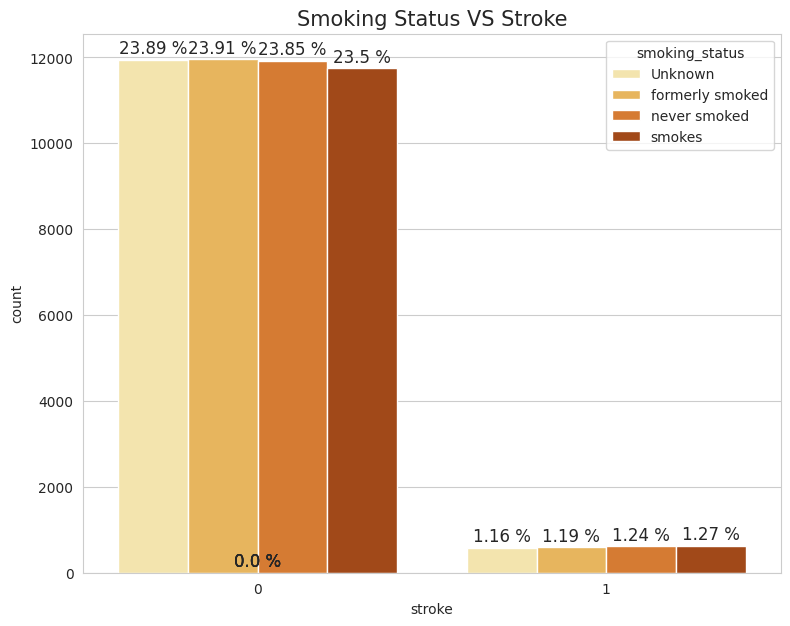

In [35]:
countplt, ax = plt.subplots(figsize = (9,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['smoking_status'],palette = 'YlOrBr',)
ax.set_title("Smoking Status VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

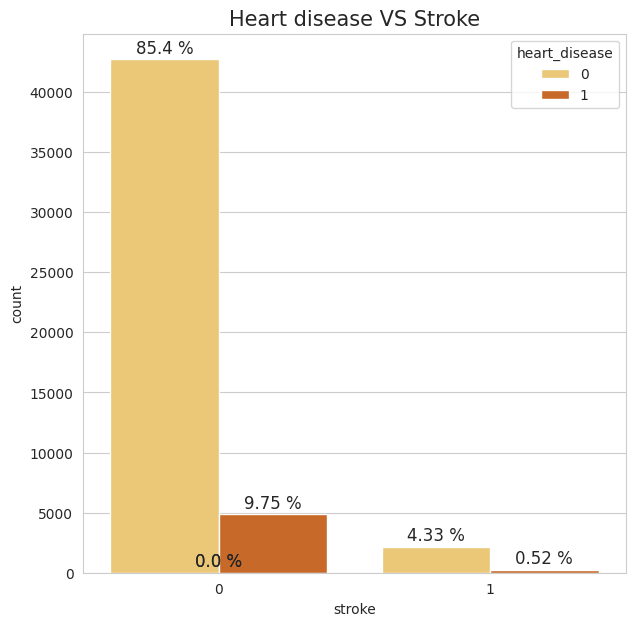

In [36]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['heart_disease'],palette = 'YlOrBr')
ax.set_title("Heart disease VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

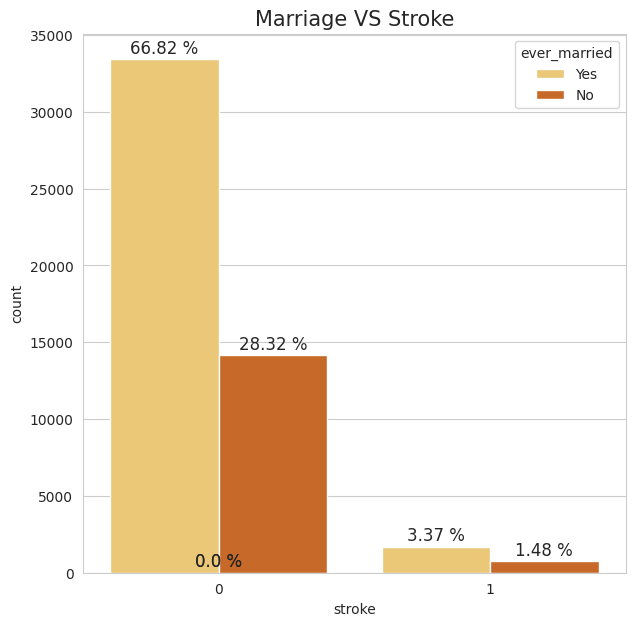

In [37]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['ever_married'],palette = 'YlOrBr')
ax.set_title("Marriage VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

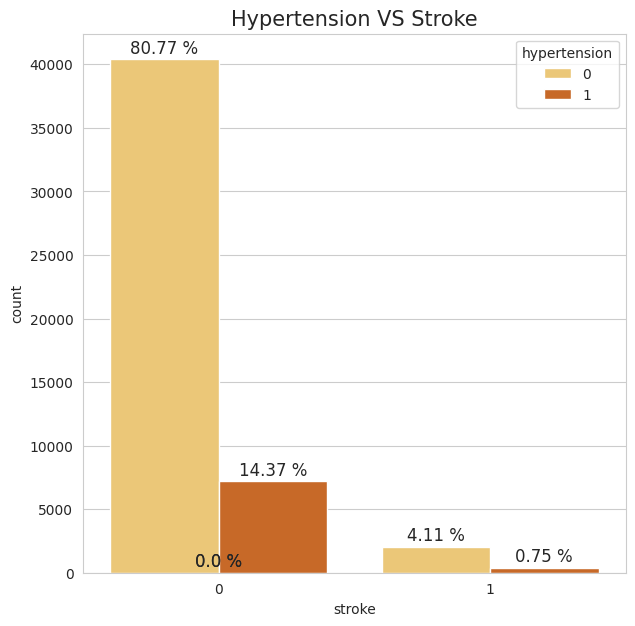

In [38]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['hypertension'],palette = 'YlOrBr')
ax.set_title("Hypertension VS Stroke",fontsize = 15)

for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

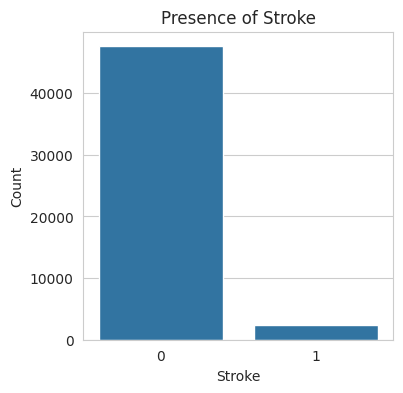

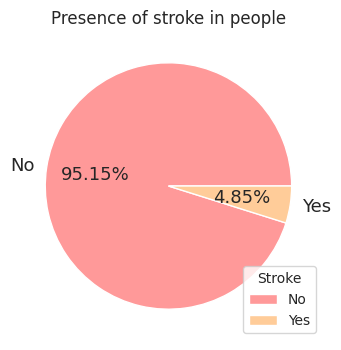

In [39]:
stroke_counts = data['stroke'].value_counts().reset_index()
stroke_counts.columns = ['Stroke', 'Count']

plt.figure(figsize = (4, 4))
bargraph = sns.barplot(x='Stroke', y='Count', data=stroke_counts)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Presence of Stroke")
plt.show()


plt.figure(figsize = (4, 4))
# Dynamically get counts for pie chart
temp = stroke_counts['Count'].tolist()
labels = ['No' if s == 0 else 'Yes' for s in stroke_counts['Stroke']]
colors = ['#ff9999','#ffcc99']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', colors = colors,textprops = textprops )
plt.title('Presence of stroke in people')
plt.legend(title = "Stroke")
plt.show()

In [40]:
print((data['stroke']).value_counts())

stroke
0    47573
1     2427
Name: count, dtype: int64


In [41]:
print("The number of positive cases is : 2427")
print("The number of negative cases is : 47573")
print("The percentage of positive cases is :", 2427/(2427+47573)*100)
print("The percentage of negative cases is :", 47573/(2427+47573))

The number of positive cases is : 2427
The number of negative cases is : 47573
The percentage of positive cases is : 4.854
The percentage of negative cases is : 0.95146


In [44]:
# Statistical Tests
from scipy.stats import chi2_contingency, ttest_ind

# Age distribution difference
stroke_age = data[data['stroke']==1]['age']
non_stroke_age = data[data['stroke']==0]['age']
t_stat, p_value = ttest_ind(stroke_age, non_stroke_age)
print(f"T-test for Age: t={t_stat:.3f}, p={p_value:.5f}")

# Risk Factor Correlation Matrix
risk_factors = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
correlation_matrix = data[risk_factors + ['stroke']].corr()

# Medical Insights Summary
def generate_medical_insights(data):
    insights = []
    # High glucose analysis
    high_glucose_stroke_rate = data[data['avg_glucose_level'] > 140]['stroke'].mean()
    insights.append(f"High glucose individuals have {high_glucose_stroke_rate*100:.1f}% stroke rate")

    # Age stratification
    for age_group in ['<50', '50-65', '65+']:
        if age_group == '<50':
            subset = data[data['age'] < 50]
        elif age_group == '50-65':
            subset = data[(data['age'] >= 50) & (data['age'] <= 65)]
        else:
            subset = data[data['age'] > 65]
        stroke_rate = subset['stroke'].mean()
        insights.append(f"Age {age_group}: {stroke_rate*100:.1f}% stroke rate")

    return insights

T-test for Age: t=0.399, p=0.69020


In [45]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
X1, Y1 = smote.fit_resample(X, Y)

In [47]:
Y.value_counts()

,count
stroke,
0,47573
1,2427


In [48]:
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

,count
stroke,
0,47573
1,47573


In [49]:
X1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,hypertension_capped,heart_disease_capped
0,0,80.300000,0,0,1,1,1,170.380000,18.400000,0,0.0,0.0
1,0,89.400000,0,0,1,3,1,186.890000,19.600000,1,0.0,0.0
2,1,87.500000,0,0,1,0,1,118.420000,34.700000,2,0.0,0.0
3,1,19.700000,0,0,1,2,1,226.010000,27.100000,3,0.0,0.0
4,1,85.200000,0,0,1,0,0,229.640000,27.600000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95141,1,89.308604,0,0,1,2,0,229.616497,32.500000,0,0.0,0.0
95142,0,77.556695,0,0,1,0,0,130.663390,37.219661,1,0.0,0.0
95143,1,29.487617,0,0,1,1,0,150.185627,34.862045,2,0.0,0.0
95144,0,49.432582,0,0,0,1,1,204.372856,15.477828,2,0.0,0.0


In [51]:
X1.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'avg_glucose_level','bmi','smoking_status', 'hypertension_capped', 'heart_disease_capped']
X1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,hypertension_capped,heart_disease_capped
0,0,80.300000,0,0,1,1,1,170.380000,18.400000,0,0.0,0.0
1,0,89.400000,0,0,1,3,1,186.890000,19.600000,1,0.0,0.0
2,1,87.500000,0,0,1,0,1,118.420000,34.700000,2,0.0,0.0
3,1,19.700000,0,0,1,2,1,226.010000,27.100000,3,0.0,0.0
4,1,85.200000,0,0,1,0,0,229.640000,27.600000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95141,1,89.308604,0,0,1,2,0,229.616497,32.500000,0,0.0,0.0
95142,0,77.556695,0,0,1,0,0,130.663390,37.219661,1,0.0,0.0
95143,1,29.487617,0,0,1,1,0,150.185627,34.862045,2,0.0,0.0
95144,0,49.432582,0,0,0,1,1,204.372856,15.477828,2,0.0,0.0


In [52]:
Y1

,stroke
0,0
1,0
2,0
3,0
4,0
...,...
95141,1
95142,1
95143,1
95144,1


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2 ,random_state = 105)

In [54]:
Y_train.value_counts()

,count
stroke,
0,38114
1,38002


In [55]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred_NB = NB.predict(X_test)
NB_accuracy = accuracy_score(Y_test,Y_pred_NB)
print(NB_accuracy*100,'%')

CM = confusion_matrix(Y_test, Y_pred_NB)
print("\nConfusion Matrix: \n", CM)

64.59800315291645 %

Confusion Matrix: 
 [[3375 6084]
 [ 653 8918]]


In [56]:
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.84      0.36      0.50      9459
           1       0.59      0.93      0.73      9571

    accuracy                           0.65     19030
   macro avg       0.72      0.64      0.61     19030
weighted avg       0.72      0.65      0.61     19030



In [57]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

specificity = 0.35680304471931495


In [58]:
y_score_NB = NB.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score_NB)
print('roc_auc_score for Gaussian Naive Bayes: ', roc_auc_score(Y_test, y_score_NB))

roc_auc_score for Gaussian Naive Bayes:  0.792317727253593


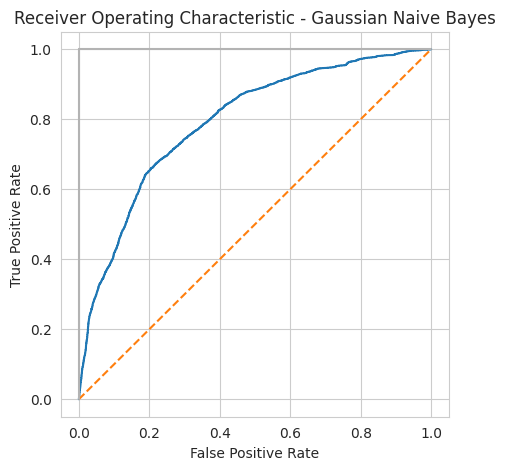

In [59]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Gaussian Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_Res_LR=LR.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, Y_Res_LR)
print(LR_Accuracy*100,'%')

71.20861797162375 %


In [61]:
CM = confusion_matrix(Y_test, Y_Res_LR)
print(CM)

[[6446 3013]
 [2466 7105]]


In [62]:
print(classification_report(Y_test, Y_Res_LR))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      9459
           1       0.70      0.74      0.72      9571

    accuracy                           0.71     19030
   macro avg       0.71      0.71      0.71     19030
weighted avg       0.71      0.71      0.71     19030

specificity = 0.6814673855587271


In [63]:
y_score_LR = LR.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score_LR)

In [64]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, y_score_LR))

roc_auc_score for Logistic Regression:  0.7811567012443511


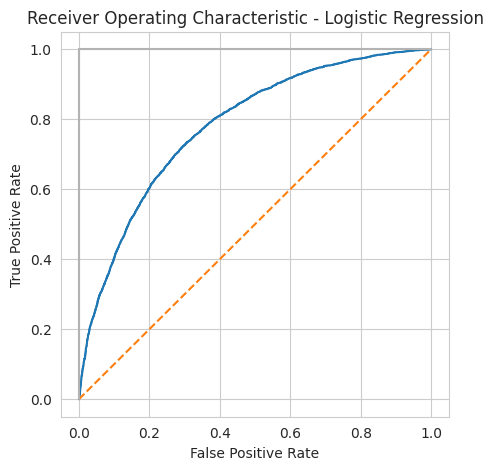

In [65]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [67]:
print(DTC.feature_importances_)
print(X_train.columns)

[0.04110915 0.22638295 0.0411686  0.0231725  0.0282172  0.07993866
 0.06238945 0.25083668 0.18364042 0.06314438 0.         0.        ]
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'hypertension_capped', 'heart_disease_capped'],
      dtype='object')


In [68]:
Y_pred_DTC = DTC.predict(X_test)
DTC_Accuracy = accuracy_score(Y_test, Y_pred_DTC)
print(DTC_Accuracy*100,'%')

86.60010509721492 %


In [69]:
imp_feature = {"Features" : [ 'age','Residence_type', 'hypetension','avg_glucose_level','smoking_status','work_type','heart_disease','bmi','ever_married','gender'],
         'values' : [0.4406506, 0.0940964,0.08614509, 0.07980055, 0.07281029,0.05769702,0.04967563,0.04671055,0.03678735,0.03562653]}
imp_feature = pd.DataFrame(data=imp_feature)
imp_feature

,Features,values
0,age,0.440651
1,Residence_type,0.094096
2,hypetension,0.086145
3,avg_glucose_level,0.079801
4,smoking_status,0.072810
5,work_type,0.057697
6,heart_disease,0.049676
7,bmi,0.046711
8,ever_married,0.036787
9,gender,0.035627


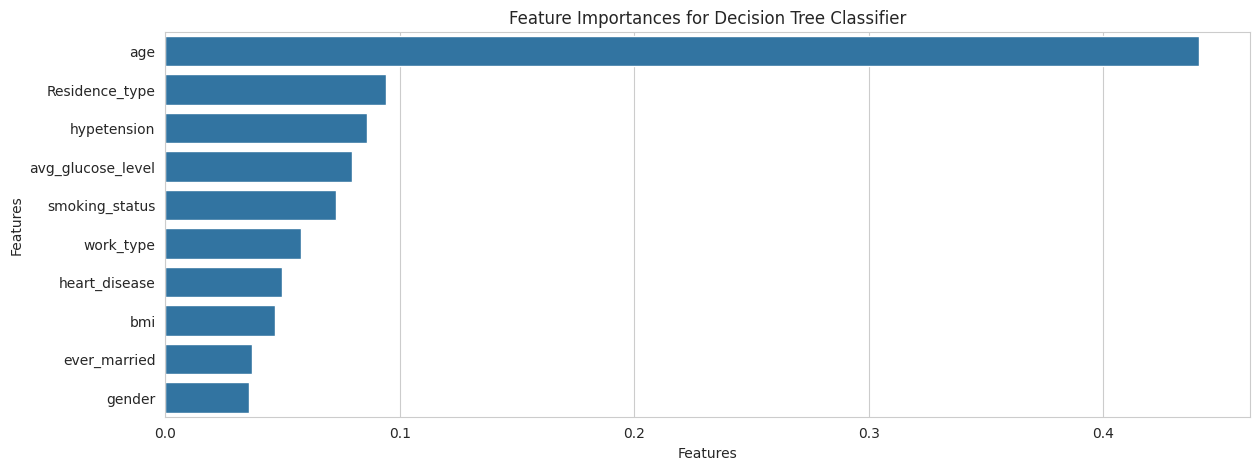

In [70]:
plt.figure(figsize = (14, 5))
bargraph = sns.barplot(x=imp_feature['values'], y = imp_feature['Features'], data=imp_feature)
plt.xlabel('Features')
plt.title("Feature Importances for Decision Tree Classifier")
plt.show()

In [71]:
CM = confusion_matrix(Y_test, Y_pred_DTC)
print(CM)

[[7935 1524]
 [1026 8545]]


In [72]:
print(classification_report(Y_test, Y_pred_DTC))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      9459
           1       0.85      0.89      0.87      9571

    accuracy                           0.87     19030
   macro avg       0.87      0.87      0.87     19030
weighted avg       0.87      0.87      0.87     19030



In [73]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

specificity = 0.838883602917856


In [74]:
y_score_DTC = DTC.predict_proba(X_test)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, y_score_DTC)
print('roc_auc_score for Decision Tree Classifier: ', roc_auc_score(Y_test, y_score_DTC))

roc_auc_score for Decision Tree Classifier:  0.8658423865597534


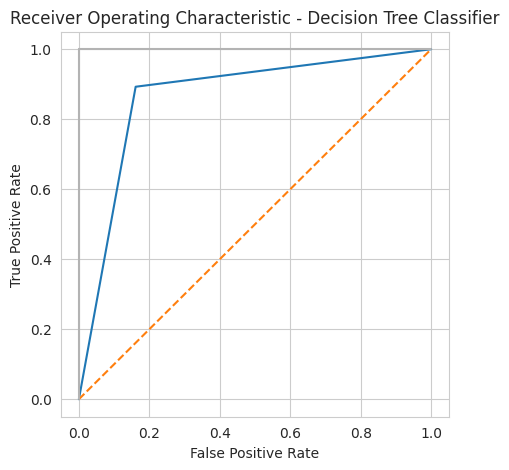

In [75]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train,Y_train)
Y_Res_KNN=KNN_clf.predict(X_test)
KNN_Accuracy = accuracy_score(Y_test, Y_Res_KNN)
print(KNN_Accuracy*100,'%')

85.33893851812927 %


In [77]:
CM = confusion_matrix(Y_test, Y_Res_KNN)
print(CM)

[[6752 2707]
 [  83 9488]]


In [78]:
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])
print(classification_report(Y_test, Y_Res_KNN))

True Positives :  9488
True Negatives :  6752
False Positives :  2707
False Negatives :  83
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      9459
           1       0.78      0.99      0.87      9571

    accuracy                           0.85     19030
   macro avg       0.88      0.85      0.85     19030
weighted avg       0.88      0.85      0.85     19030



In [79]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

specificity = 0.713817528279945


In [80]:
y_score_KNN = KNN_clf.predict_proba(X_test)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, y_score_KNN)
print('roc_auc_score for K Nearest Neighbour is: ', roc_auc_score(Y_test, y_score_KNN))

roc_auc_score for K Nearest Neighbour is:  0.9449986070684837


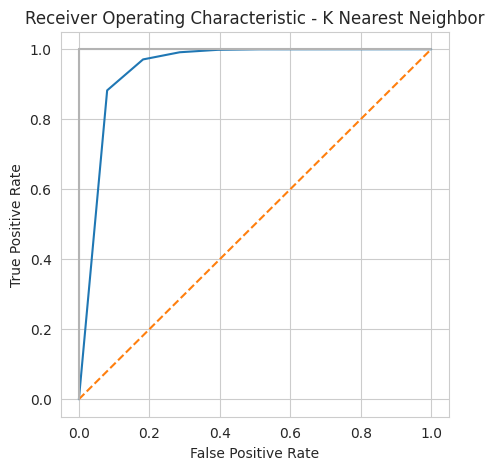

In [81]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - K Nearest Neighbor')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
ADC = AdaBoostClassifier()
ADC.fit(X_train,Y_train)
Y_pred_ADC = ADC.predict(X_test)
ADC_Accuracy = accuracy_score(Y_test,Y_pred_ADC)
print(ADC_Accuracy*100,"%")

72.55911718339463 %


In [83]:
CM = confusion_matrix(Y_test, Y_pred_ADC)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

[[6889 2570]
 [2652 6919]]
True Positives :  6919
True Negatives :  6889
False Positives :  2570
False Negatives :  2652


In [84]:
print(classification_report(Y_test, Y_pred_ADC))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      9459
           1       0.73      0.72      0.73      9571

    accuracy                           0.73     19030
   macro avg       0.73      0.73      0.73     19030
weighted avg       0.73      0.73      0.73     19030



In [85]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

specificity = 0.7283010889100328


In [86]:
y_score_ADC = ADC.predict_proba(X_test)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(Y_test, y_score_ADC)

In [87]:
print('roc_auc_score for AdaBoost is: ', roc_auc_score(Y_test, y_score_ADC))

roc_auc_score for AdaBoost is:  0.8011920226429327


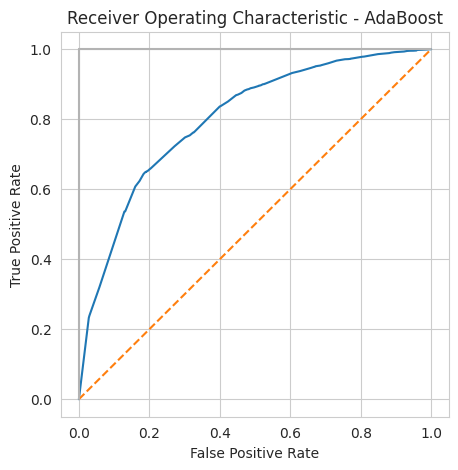

In [88]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
RF = RandomForestClassifier(n_estimators=1000, random_state=47 , n_jobs = 3)
RF.fit(X_train,Y_train)
Y_Res_RF=RF.predict(X_test)
RF_Accuracy = accuracy_score(Y_test, Y_Res_RF)
print(RF_Accuracy*100,'%')

91.21912769311614 %


In [90]:
CM = confusion_matrix(Y_test, Y_Res_RF)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

[[8360 1099]
 [ 572 8999]]
True Positives :  8999
True Negatives :  8360
False Positives :  1099
False Negatives :  572


In [91]:
print(classification_report(Y_test, Y_Res_RF))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9459
           1       0.89      0.94      0.92      9571

    accuracy                           0.91     19030
   macro avg       0.91      0.91      0.91     19030
weighted avg       0.91      0.91      0.91     19030

specificity = 0.8838143566973253


In [92]:
y_score_RF = RF.predict_proba(X_test)[:,1]
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(Y_test, y_score_RF)
print('roc_auc_score for XGBoost is: ', roc_auc_score(Y_test, y_score_RF))

roc_auc_score for XGBoost is:  0.9669771510519325


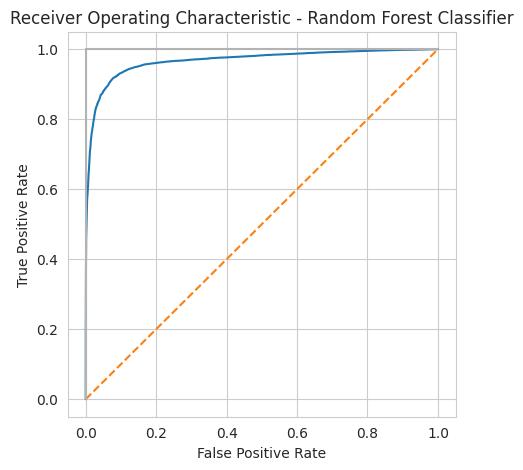

In [93]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.plot(false_positive_rate7, true_positive_rate7)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
XG_classifier = XGBClassifier()
XG_classifier.fit(X_train, Y_train)
Y_pred_xg = XG_classifier.predict(X_test)
XG_Accuracy = accuracy_score(Y_test,Y_pred_xg)
print(XG_Accuracy*100,"%")

82.43300052548608 %


In [95]:
features = X_train.columns
importances = XG_classifier.feature_importances_
print(features)
print(importances)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'hypertension_capped', 'heart_disease_capped'],
      dtype='object')
[0.10663489 0.01995761 0.25212145 0.18513371 0.07723493 0.07212717
 0.19020905 0.02172633 0.02317465 0.05168017 0.         0.        ]


In [96]:
imp_feature_xg = {'features' : ['age','Residence_type', 'gender','hypertension','work_type','heart_disease','smoking_status','ever_married','bmi', 'avg_glucose_level'] , 'values' : [ 0.20928001,0.16508496,0.1434009,0.10393379,0.10006149,0.09203752,0.08475993,0.06718082,0.02110756,0.01315293]}
imp_feature_xg = pd.DataFrame(imp_feature_xg)

In [97]:
CM = confusion_matrix(Y_test, Y_pred_xg)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

print("\n", classification_report(Y_test, Y_pred_xg))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

[[7526 1933]
 [1410 8161]]
True Positives :  8161
True Negatives :  7526
False Positives :  1933
False Negatives :  1410

               precision    recall  f1-score   support

           0       0.84      0.80      0.82      9459
           1       0.81      0.85      0.83      9571

    accuracy                           0.82     19030
   macro avg       0.83      0.82      0.82     19030
weighted avg       0.83      0.82      0.82     19030

specificity = 0.7956443598689079


In [98]:
y_score_xg = XG_classifier.predict_proba(X_test)[:,1]
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(Y_test, y_score_xg)
print('roc_auc_score for XGBoost is: ', roc_auc_score(Y_test, y_score_xg))

roc_auc_score for XGBoost is:  0.9013055083706287


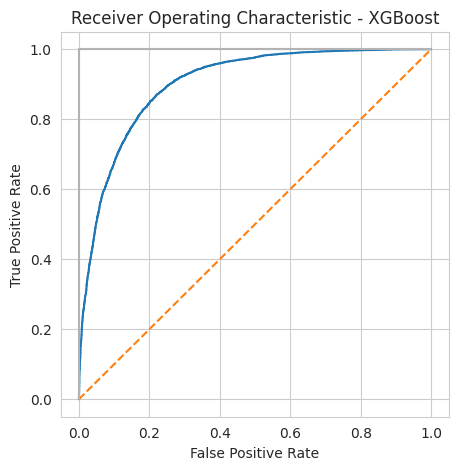

In [99]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate6, true_positive_rate6)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
A = {'Models' : ['Gaussian Naive Bayes','Logistic Regression', 'Decision Tree Classifier', 'K Nearest Neighbors', 'AdaBoost','XGBoost', 'Random Forest Classifier'],'AUC Scores' :[ roc_auc_score(Y_test, y_score_NB), roc_auc_score(Y_test, y_score_LR), roc_auc_score(Y_test, y_score_DTC), roc_auc_score(Y_test, y_score_KNN), roc_auc_score(Y_test, y_score_ADC), roc_auc_score(Y_test, y_score_xg), roc_auc_score(Y_test, y_score_RF)]}
A = pd.DataFrame(A)
A

,Models,AUC Scores
0,Gaussian Naive Bayes,0.792318
1,Logistic Regression,0.781157
2,Decision Tree Classifier,0.865842
3,K Nearest Neighbors,0.944999
4,AdaBoost,0.801192
5,XGBoost,0.901306
6,Random Forest Classifier,0.966977


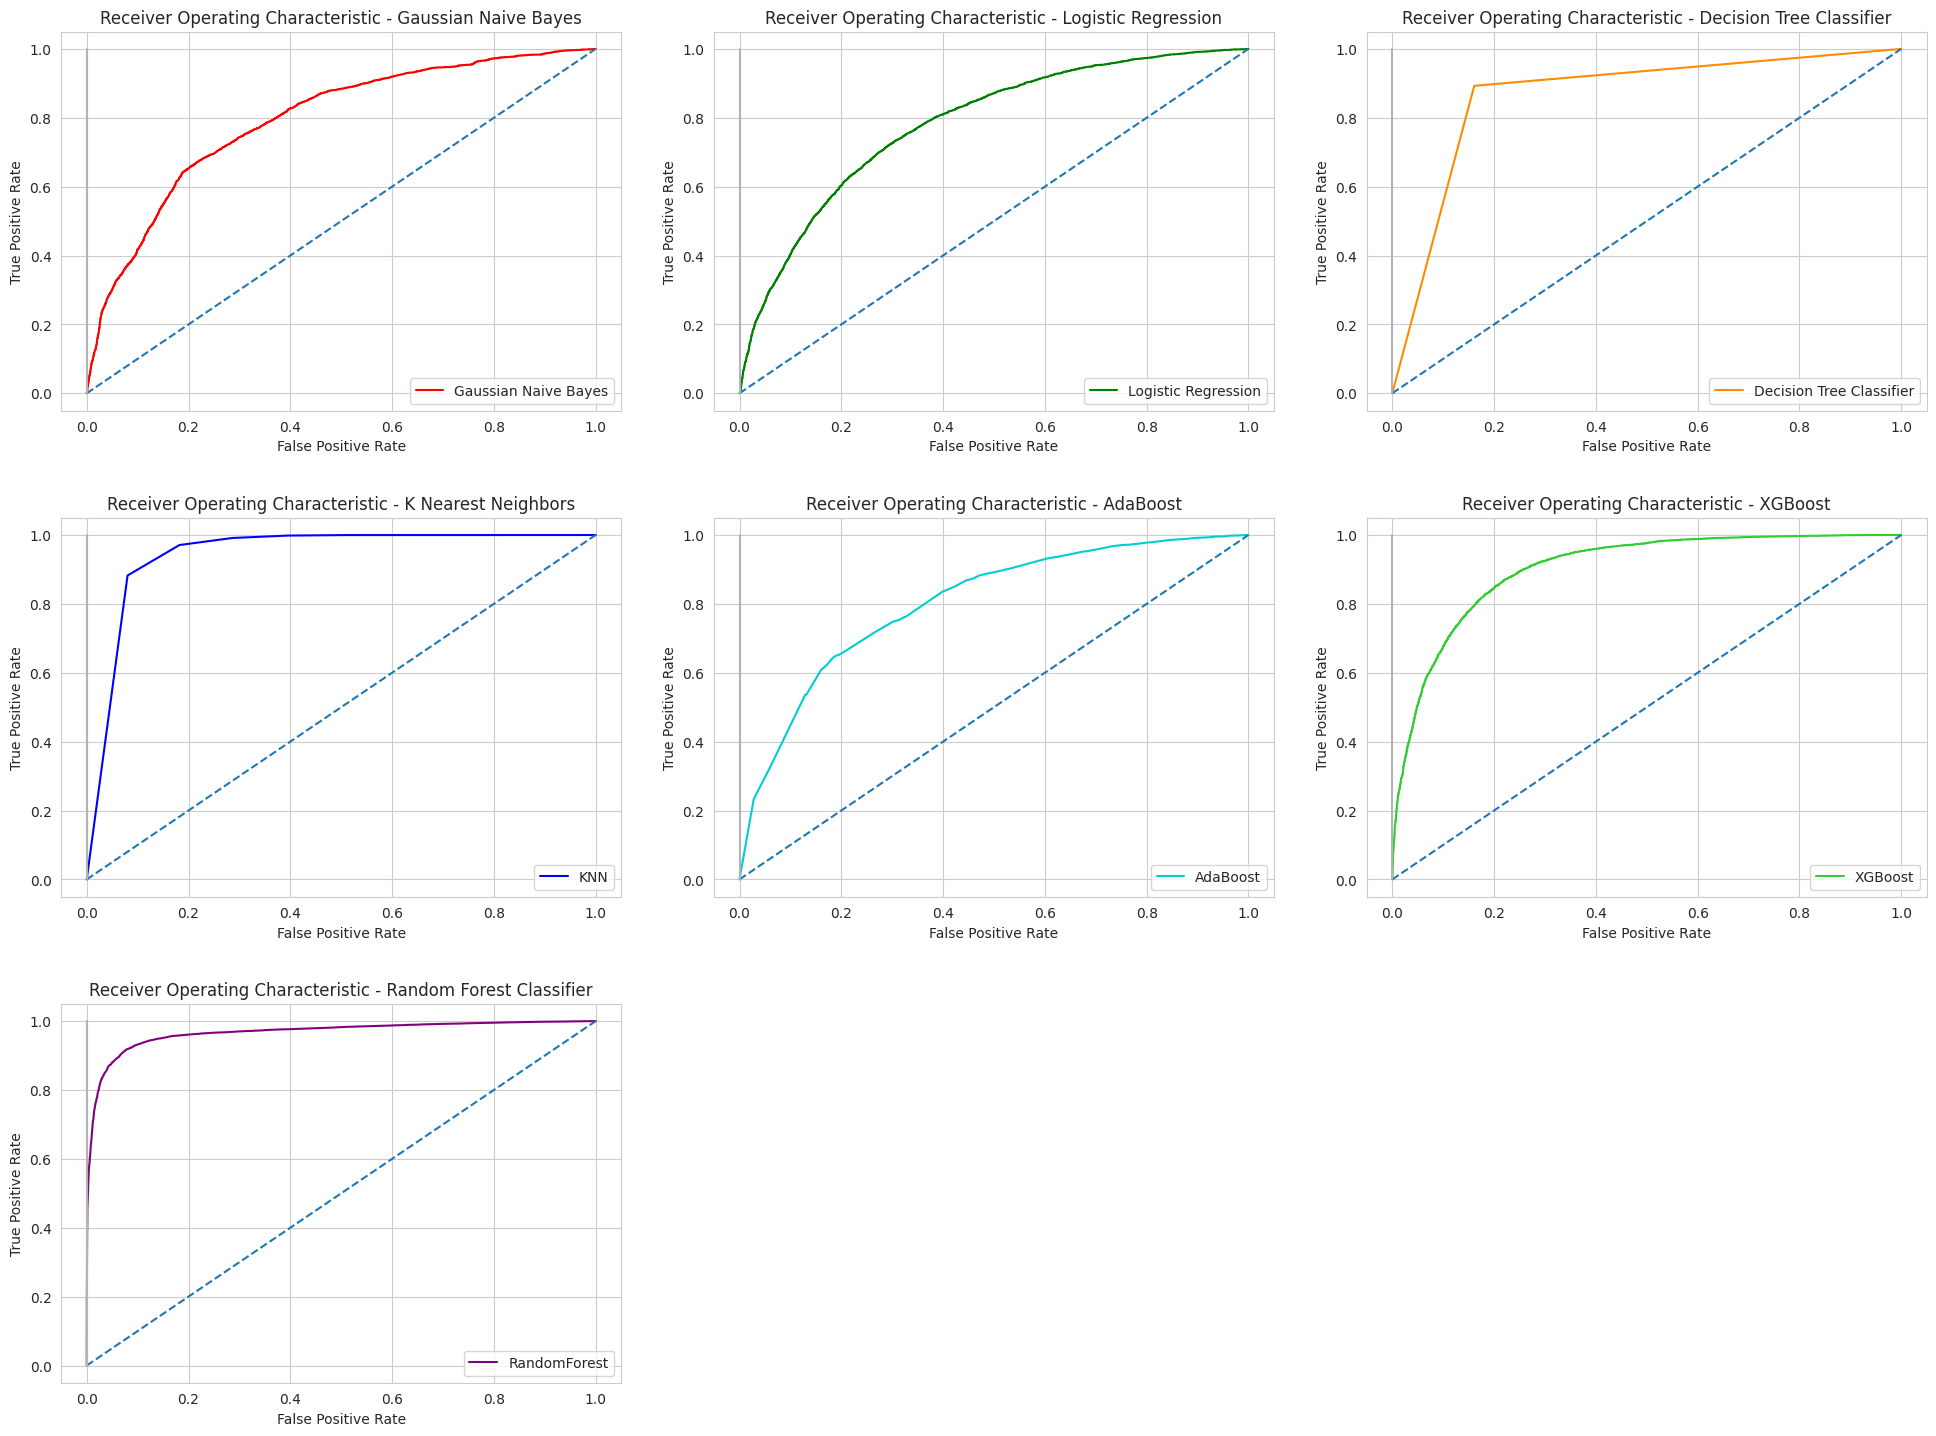

In [102]:
fig, ax = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(20)

ax[0, 0].set_title('Receiver Operating Characteristic - Gaussian Naive Bayes')
ax[0, 0].plot(false_positive_rate1, true_positive_rate1, color = 'red', label = 'Gaussian Naive Bayes')
ax[0, 0].legend()
ax[0, 0].plot([0, 1], ls="--")
ax[0, 0].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[0, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[0, 1].set_title('Receiver Operating Characteristic - Logistic Regression')
ax[0, 1].plot(false_positive_rate2, true_positive_rate2,color = 'green', label = 'Logistic Regression')
ax[0, 1].plot([0, 1], ls="--")
ax[0, 1].legend()
ax[0, 1].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[0, 1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[0, 2].set_title('Receiver Operating Characteristic - Decision Tree Classifier')
ax[0, 2].plot(false_positive_rate3, true_positive_rate3,color = 'darkorange', label = 'Decision Tree Classifier')
ax[0, 2].legend()
ax[0, 2].plot([0, 1], ls="--")
ax[0, 2].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[0, 2].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[1, 0].set_title('Receiver Operating Characteristic - K Nearest Neighbors')
ax[1, 0].plot(false_positive_rate4, true_positive_rate4,color = 'blue', label = 'KNN')
ax[1, 0].legend()
ax[1, 0].plot([0, 1], ls="--")
ax[1, 0].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[1, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')


ax[1, 1].set_title('Receiver Operating Characteristic - AdaBoost')
ax[1, 1].plot(false_positive_rate5, true_positive_rate5,color = 'darkturquoise', label = 'AdaBoost')
ax[1, 1].legend()
ax[1, 1].plot([0, 1], ls="--")
ax[1, 1].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[1, 1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[1, 2].set_title('Receiver Operating Characteristic - XGBoost')
ax[1, 2].plot(false_positive_rate6, true_positive_rate6,color = 'limegreen', label = 'XGBoost')
ax[1, 2].legend()
ax[1, 2].plot([0, 1], ls="--")
ax[1, 2].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[1, 2].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[2, 0].set_title('Receiver Operating Characteristic - Random Forest Classifier')
ax[2, 0].plot(false_positive_rate7, true_positive_rate7, color = 'purple', label = 'RandomForest')
ax[2, 0].legend()
ax[2, 0].plot([0, 1], ls="--")
ax[2, 0].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[2, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax[2, 1].set_visible(False)
ax[2, 2].set_visible(False)

fig.tight_layout(pad=3.0)
plt.show()


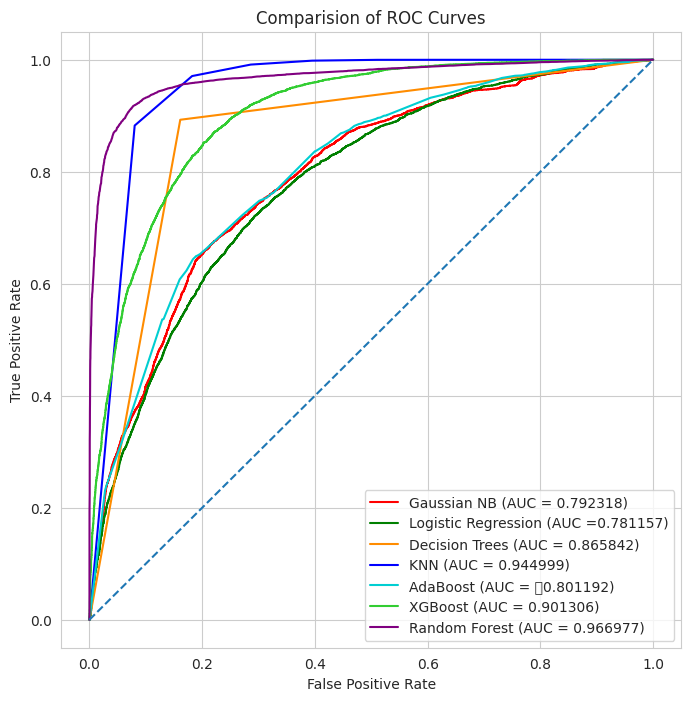

In [104]:
plt.figure(figsize=(8,8))
plt.title('Comparision of ROC Curves')
plt.plot(false_positive_rate1, true_positive_rate1, color = 'red', label = 'Gaussian NB (AUC = 0.792318) ')
plt.plot(false_positive_rate2, true_positive_rate2, color = 'green', label = 'Logistic Regression (AUC =0.781157)')
plt.plot(false_positive_rate3, true_positive_rate3, color = 'darkorange', label = 'Decision Trees (AUC = 0.865842)')
plt.plot(false_positive_rate4, true_positive_rate4, color = 'blue', label = 'KNN (AUC = 0.944999)')
plt.plot(false_positive_rate5, true_positive_rate5, color = 'darkturquoise', label = 'AdaBoost (AUC = 	0.801192)')
plt.plot(false_positive_rate6, true_positive_rate6, color = 'limegreen', label = 'XGBoost (AUC = 0.901306)')
plt.plot(false_positive_rate7, true_positive_rate7, color = 'purple', label = 'Random Forest (AUC = 0.966977)')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

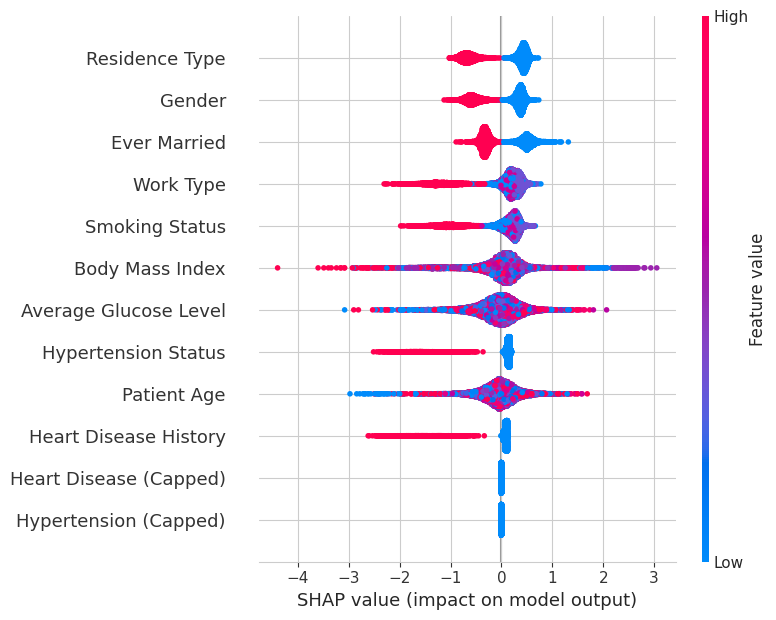

In [107]:
import shap

# SHAP Analysis
explainer = shap.TreeExplainer(XG_classifier)
shap_values = explainer.shap_values(X_test)

# Feature importance plot with medical context
feature_descriptions = {
    'age': 'Patient Age',
    'avg_glucose_level': 'Average Glucose Level',
    'bmi': 'Body Mass Index',
    'hypertension': 'Hypertension Status',
    'heart_disease': 'Heart Disease History',
    'gender': 'Gender',
    'ever_married': 'Ever Married',
    'work_type': 'Work Type',
    'Residence_type': 'Residence Type',
    'smoking_status': 'Smoking Status',
    'hypertension_capped': 'Hypertension (Capped)',
    'heart_disease_capped': 'Heart Disease (Capped)'
}

# Create a list of feature names in the order of X_test columns
display_feature_names = [feature_descriptions.get(col, col) for col in X_test.columns]

shap.summary_plot(shap_values, X_test, feature_names=display_feature_names)


In [108]:
def clinical_validation(y_true, y_pred, y_pred_proba):
    """Validate model from clinical perspective"""

    # Sensitivity Analysis (Recall for stroke cases)
    sensitivity = recall_score(y_true, y_pred)

    # Specificity Analysis (Recall for non-stroke cases)
    specificity = recall_score(1-y_true, 1-y_pred)

    # Positive Predictive Value in high-risk groups
    high_risk_threshold = 0.7
    high_risk_indices = y_pred_proba > high_risk_threshold
    if sum(high_risk_indices) > 0:
        ppv_high_risk = y_true[high_risk_indices].mean()
    else:
        ppv_high_risk = 0

    return {
        'sensitivity': sensitivity,
        'specificity': specificity,
        'ppv_high_risk': ppv_high_risk,
        'high_risk_capture_rate': sum(high_risk_indices)/len(y_true)
    }


In [114]:
# Streamlit-like report (conceptual)
def create_interactive_report():
    st.title("Stroke Prediction Analysis Dashboard")
    st.sidebar.header("Risk Factor Controls")

    # Interactive sliders for risk factors
    age = st.sidebar.slider("Age", 18, 90, 50)
    glucose = st.sidebar.slider("Glucose Level", 70, 250, 100)

    # Real-time prediction update
    user_data = preprocess_input(age, glucose, ...)
    prediction = model.predict_proba(user_data)[0][1]

    st.metric("Stroke Risk Probability", f"{prediction*100:.1f}%")



In [113]:
from sklearn.metrics import confusion_matrix

def cost_benefit_analysis(y_true, y_pred, cost_matrix):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    total_cost = (
        tp * cost_matrix['true_positive'] +
        fp * cost_matrix['false_positive'] +
        fn * cost_matrix['false_negative'] +
        tn * cost_matrix['true_negative']
    )
    return total_cost


cost_matrix = {
    'true_positive': -1000,   # Benefit from timely treatment
    'false_positive': 500,    # Cost of unnecessary tests/anxiety
    'false_negative': 10000,  # High cost of missed stroke (severe consequences)
    'true_negative': -50      # Benefit of correct non-stroke prediction
}

total_cost_rf = cost_benefit_analysis(Y_test, Y_Res_RF, cost_matrix)
print(f"Total Cost for Random Forest Classifier: ${total_cost_rf:,.2f}")

Total Cost for Random Forest Classifier: $-3,147,500.00


In [116]:
# Compare with existing clinical rules
def compare_with_clinical_rules(data, y_test, y_pred_proba):
    """Compares model performance against an approximation of clinical rules."""
    # CHA2DS2-VASc score approximation
    def chads2_vasc_score(row):
        score = 0
        score += (row['age'] >= 75) * 2
        score += (row['age'] >= 65) * 1
        score += row['hypertension'] * 1
        score += (row['avg_glucose_level'] > 140) * 1
        return score

    data['clinical_score'] = data.apply(chads2_vasc_score, axis=1)

    # Compare performance
    clinical_auc = roc_auc_score(data['stroke'], data['clinical_score'])
    model_auc = roc_auc_score(y_test, y_pred_proba)

    return clinical_auc, model_auc

# Call the function and print the results
clinical_auc, model_auc = compare_with_clinical_rules(data.copy(), Y_test, y_score_RF)
print(f"Clinical Rules (CHA2DS2-VASc approx) AUC: {clinical_auc:.4f}")
print(f"Random Forest Model AUC: {model_auc:.4f}")

Clinical Rules (CHA2DS2-VASc approx) AUC: 0.5039
Random Forest Model AUC: 0.9670
